# Parameter scheduling

_30 July 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

In digital schemes, this compares "aligned" parameter scheduling with "staggered" parameter scheduling, as implemented in [`b63fc83`](https://github.com/czlee/jadeite/commit/b63fc833d8c0e3ef7fbe46cdcb8edb2d61f5e9a9).

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, plot_comparison, show_timestamp_info

In [2]:
results_dir = Path("results/20210728-aligned-vs-staggered/")
show_timestamp_info(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **28 Jul 2021, 07:14:54** | 28 Jul 2021, 11:18:03 | 4 h 03 min 08 s |
| last to finish | 29 Jul 2021, 03:14:52 | **29 Jul 2021, 03:42:49** | 27 min 57 s |
| shortest | 28 Jul 2021, 23:44:40 | 28 Jul 2021, 23:55:32 | **10 min 51 s** |
| longest | 28 Jul 2021, 07:15:49 | 28 Jul 2021, 11:23:17 | **4 h 07 min 27 s** |


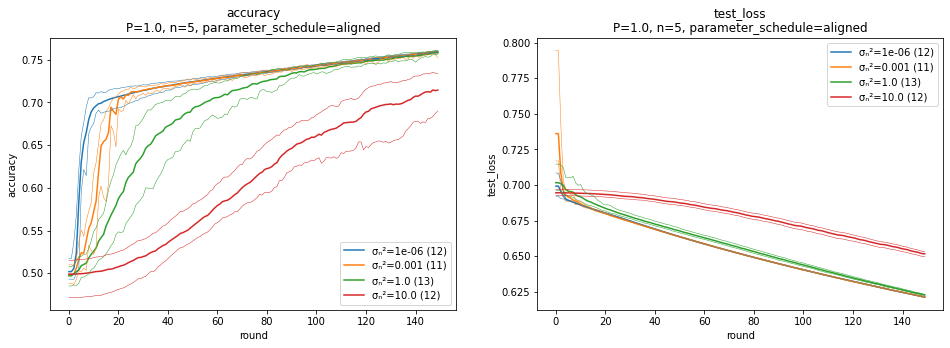

In [3]:
fixed_specs = {
    'rounds': 150,
    'batch_size': 64,
    'lr_client': 0.01,
    'momentum_client': 0.0,
    'epochs': 1,
    'dataset': 'epsilon',
    'ema_coefficient': 1 / 3,
    'qrange_update_period': 1,
    'qrange_param_quantile': 0.9,
    'qrange_client_quantile': 0.9,
    'data_per_client': 20000,
    'channel_uses': None,
    'rounding_method': 'stochastic',
    'send': 'deltas',
    'zero_bits_strategy': 'read-zero',
}
title_specs = {
    'power': 1.0,
    'clients': 5,
    'parameter_schedule': 'aligned',
}
series_specs = {
    'noise': [1e-6, 1e-3, 1, 10],
}
fields = ['accuracy', 'test_loss']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs, plot_range=True)

This is consistent with the plots in dynamic-1.ipynb (as it should be), so that's a good sign there's not a regression here.

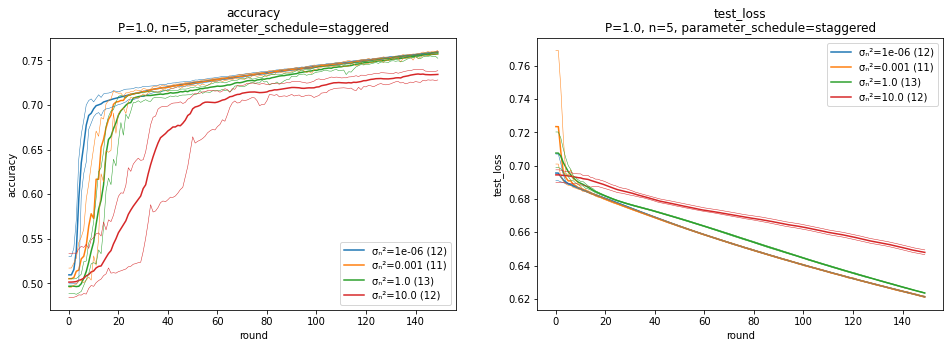

In [4]:
title_specs['parameter_schedule'] = 'staggered'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs, plot_range=True)

Definitely an improvement.

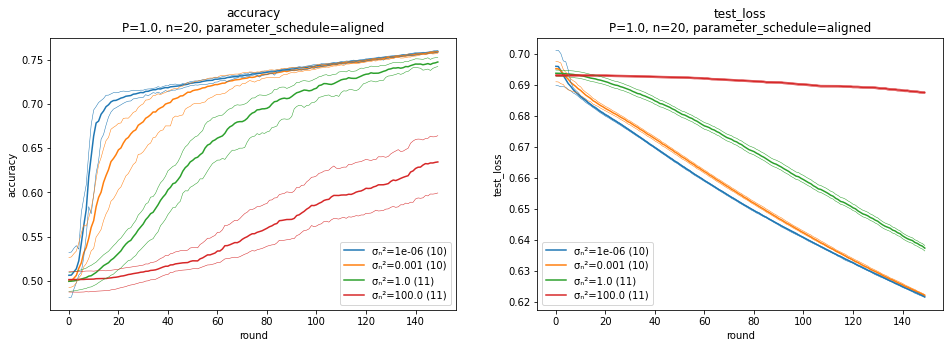

In [5]:
title_specs['clients'] = 20
title_specs['parameter_schedule'] = 'aligned'
series_specs['noise'] = [1e-6, 1e-3, 1, 100]
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs, plot_range=True)

Also matches dynamic-1.ipynb.

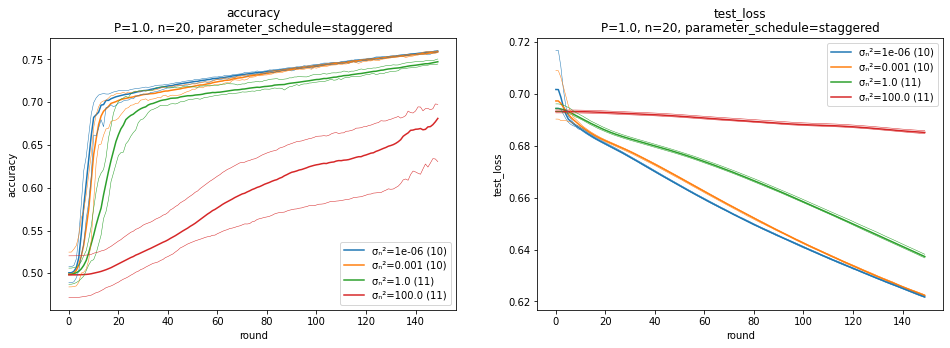

In [6]:
title_specs['clients'] = 20
title_specs['parameter_schedule'] = 'staggered'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs, plot_range=True)

Also a clear improvement.

# Comparison to analog

Using the same results as in dynamic-1.ipynb.

In [7]:
analog_path = [Path("results/20210722-dynpower-2/"), Path("results/20210723-lownoise-dynpower"), Path("results/20210724-epsilon-dynpower")]
digital_path = [Path("results/20210728-aligned-vs-staggered/")]

def get_comparison_specs(clients, noise, parameter_schedule):

    common_fixed_specs = {
        'rounds': 150,
        'batch_size': 64,
        'lr_client': 0.01,
        'momentum_client': 0.0,
        'epochs': 1,
        'dataset': 'epsilon',
        'ema_coefficient': 1 / 3,
        'data_per_client': 20000,
    }

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'power_update_period': 1,
        'power_quantile': 0.9,
        'power_factor': 0.9,
    })
    title_specs = {
        'power': 1.0,
        'clients': clients,
        'send': 'deltas',
    }
    series_specs = {
        'noise': noise,
    }

    all_analog_specs = title_specs, fixed_specs, series_specs

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'qrange_update_period': 1,
        'qrange_param_quantile': 0.9,
        'qrange_client_quantile': 0.9,
        'channel_uses': None,
        'rounding_method': ['stochastic', '__missing__'],
    })
    title_specs = title_specs.copy()
    title_specs.update({
        'parameter_schedule': parameter_schedule,
        'zero_bits_strategy': 'read-zero',
    })

    all_digital_specs = title_specs, fixed_specs, series_specs
    
    return all_analog_specs, all_digital_specs

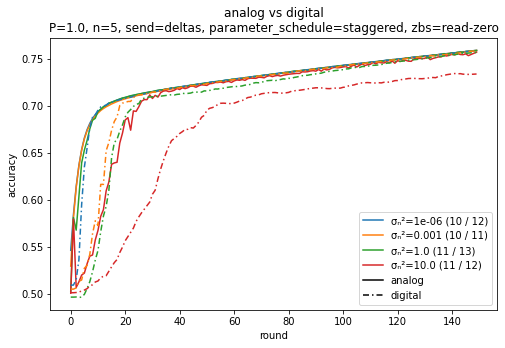

In [8]:
all_specs = get_comparison_specs(5, [1e-6, 1e-3, 1, 10], 'staggered')
plot_comparison('accuracy', analog_path, digital_path, *all_specs)

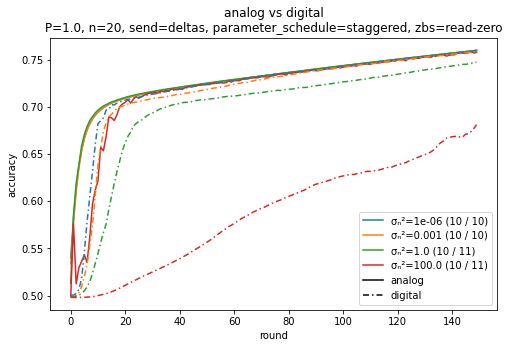

In [9]:
all_specs = get_comparison_specs(20, [1e-6, 1e-3, 1, 100], 'staggered')
plot_comparison('accuracy', analog_path, digital_path, *all_specs)

For comparison, here are the `aligned` plots. These match the final plots in dynamic-1.ipynb, but use the data generated on commit `b63fc83` or `fe778e0`.

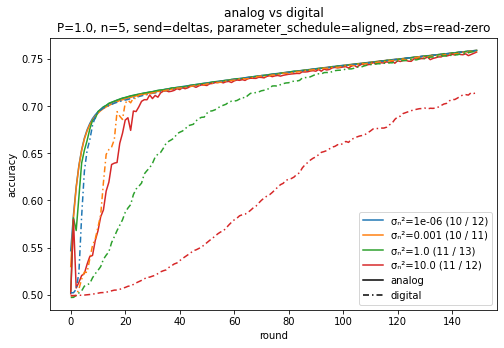

In [10]:
all_specs = get_comparison_specs(5, [1e-6, 1e-3, 1, 10], 'aligned')
plot_comparison('accuracy', analog_path, digital_path, *all_specs)

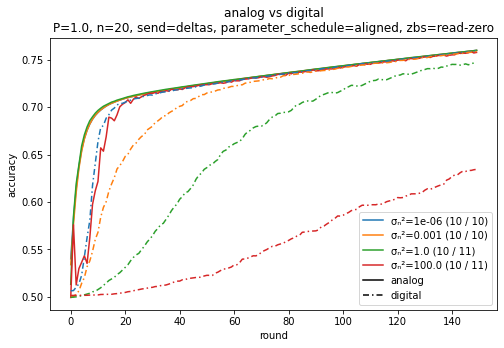

In [11]:
all_specs = get_comparison_specs(20, [1e-6, 1e-3, 1, 100], 'aligned')
plot_comparison('accuracy', analog_path, digital_path, *all_specs)